# BoomBikes Linear Regression
## Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

they want to understand the factors affecting the demand for these shared bikes in the American market. 
The company wants to know:-

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us import NumPy and Pandas and read the dataset for BoomBikes

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the dataset and check head for few rows

bikes = pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#inspecting shape i.e number of records nd columns

bikes.shape

(730, 16)

In [5]:
#check info() to see the datatypes and missing values

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Inference: 
- There seems to be 730 values for all columns, which is same as number of rows. This shows no missing value in the dataset.

In [6]:
# double check for missing fields

bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
bikes.season.unique()
#value_counts()

array([1, 2, 3, 4], dtype=int64)

In [10]:
#Number of unique values of each column

bikes.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

#### With data dictionart and unique values of columns we see that:
- season,yr,mnth,holiday,weekday, workingday and weathersit are all categorical variables
- instant is an indexer, it has unique value for every record
- dteday is the date field, and is unique for every record. 

In [11]:
# let us change weathersit to string based on its value
bikes.weathersit.value_counts()


1    463
2    246
3     21
Name: weathersit, dtype: int64

weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

so we cam map 1=clear, 2= cloudy, 3=rain, 4=heavy rain
- value_counts only shows no bikes were rented on 4=heavy rain


In [12]:
bikes['weathersit'] = bikes['weathersit'].map({1:'clear', 2:'cloudy', 3:'rain', 4:'heavy rain'})

In [13]:
bikes['weathersit'].head()

0    cloudy
1    cloudy
2     clear
3     clear
4     clear
Name: weathersit, dtype: object

In [14]:
# mapping season season (1:spring, 2:summer, 3:fall, 4:winter)
bikes['season'] = bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikes['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
# mapping mnth to mmm values
bikes['mnth'] = bikes['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                                   7:'Jul', 8:'Aug', 9:'Sep',10:'Oct', 11:'Nov', 12:'Dec'})

In [16]:
# mapping weekday to day of the week (1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun') as it is for US company
bikes['weekday'] = bikes['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
bikes['weekday'].value_counts()

Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64

In [17]:
# Let us change the datatype of instant to str as we do not want calculation t be done on it

bikes.instant = bikes.instant.astype('str')
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    object 
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 91.4+ KB


In [18]:
# Display few rows using head
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Visualising the Data

Let's now **understanding the data** which is most important step .
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#### Visualising Numeric Variables



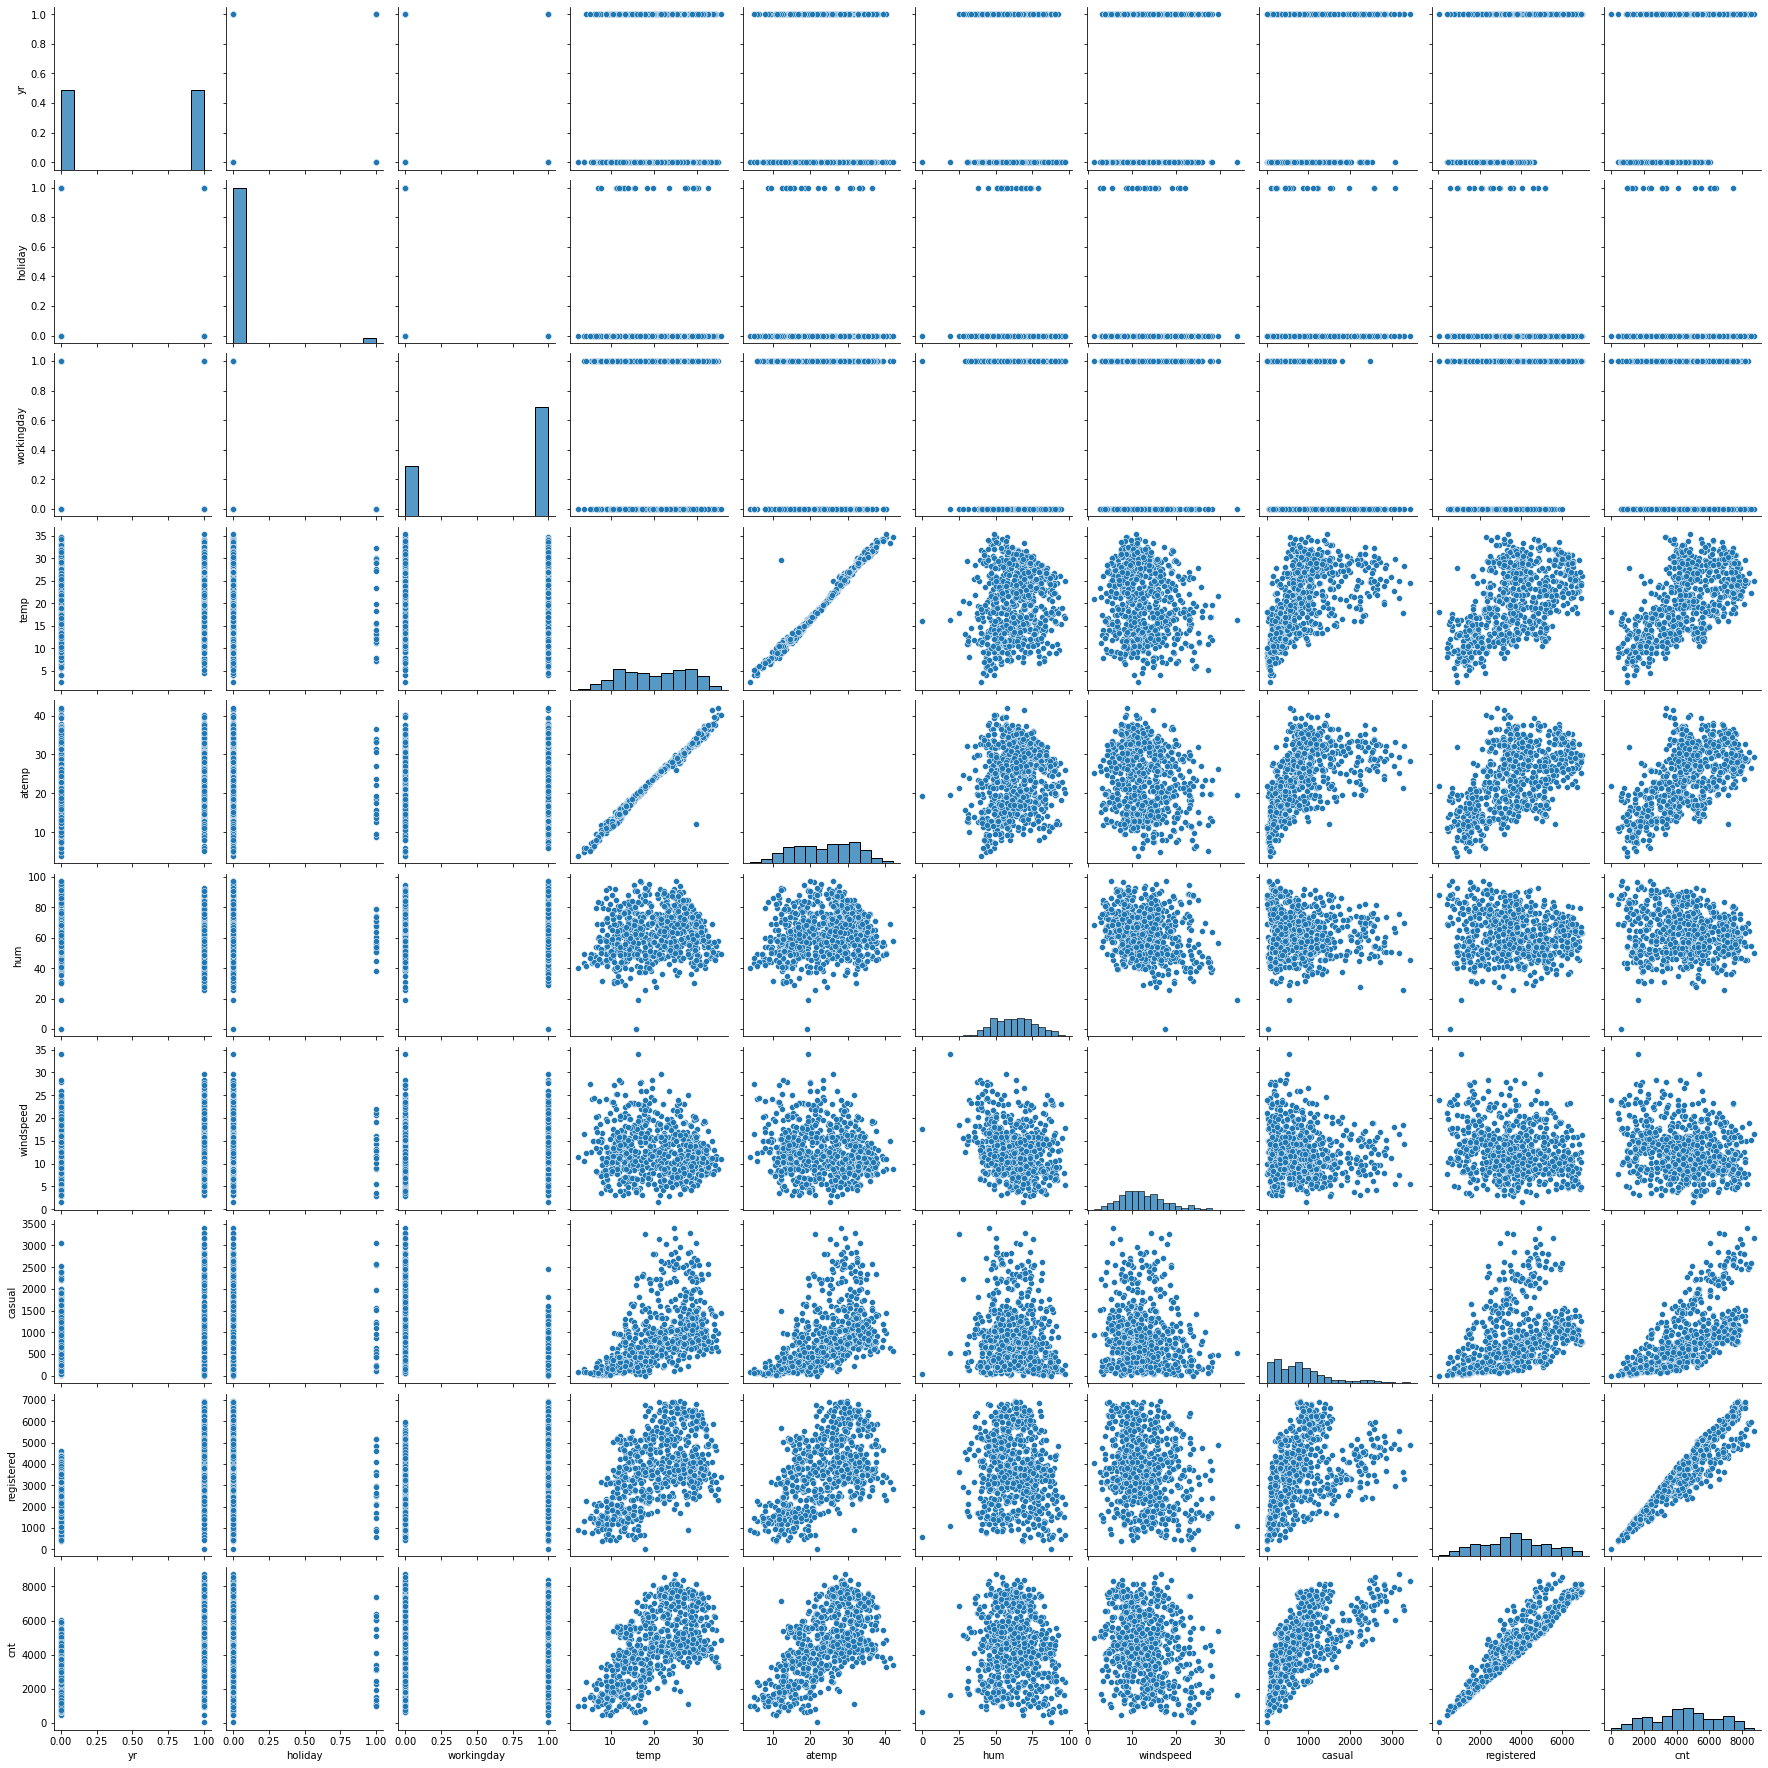

In [20]:
# as number of numeric vars = 11 so we might end up having 121 graps on directly calling sns.pairplot(bikes)
sns.pairplot(bikes)

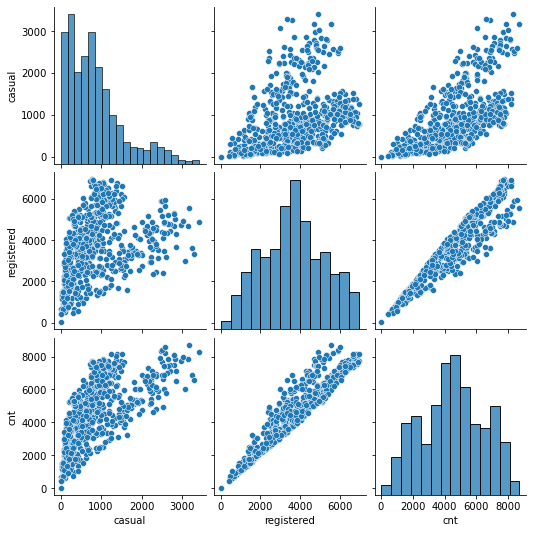

In [21]:
# we shal identify the target variable and shall visualise is against all the independent variable 

# as we have 3 dependent variables 'casual','registered','cnt', we shall try out pair plot among them
sns.pairplot(bikes, x_vars=['casual','registered','cnt'], y_vars=['casual','registered','cnt']  )

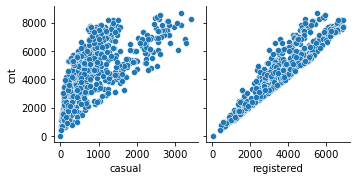

In [22]:
# we understand from dictionary that casual + registered = cnt
# more presisely we shall check cnt agains the other two variables

sns.pairplot(bikes, x_vars=['casual','registered'], y_vars=['cnt']  )
plt.show()

###  great amount of positive coorelation is seen, so we can consder 'cnt' as the output variable. we can leave casual and registered as they are also represented within cnt


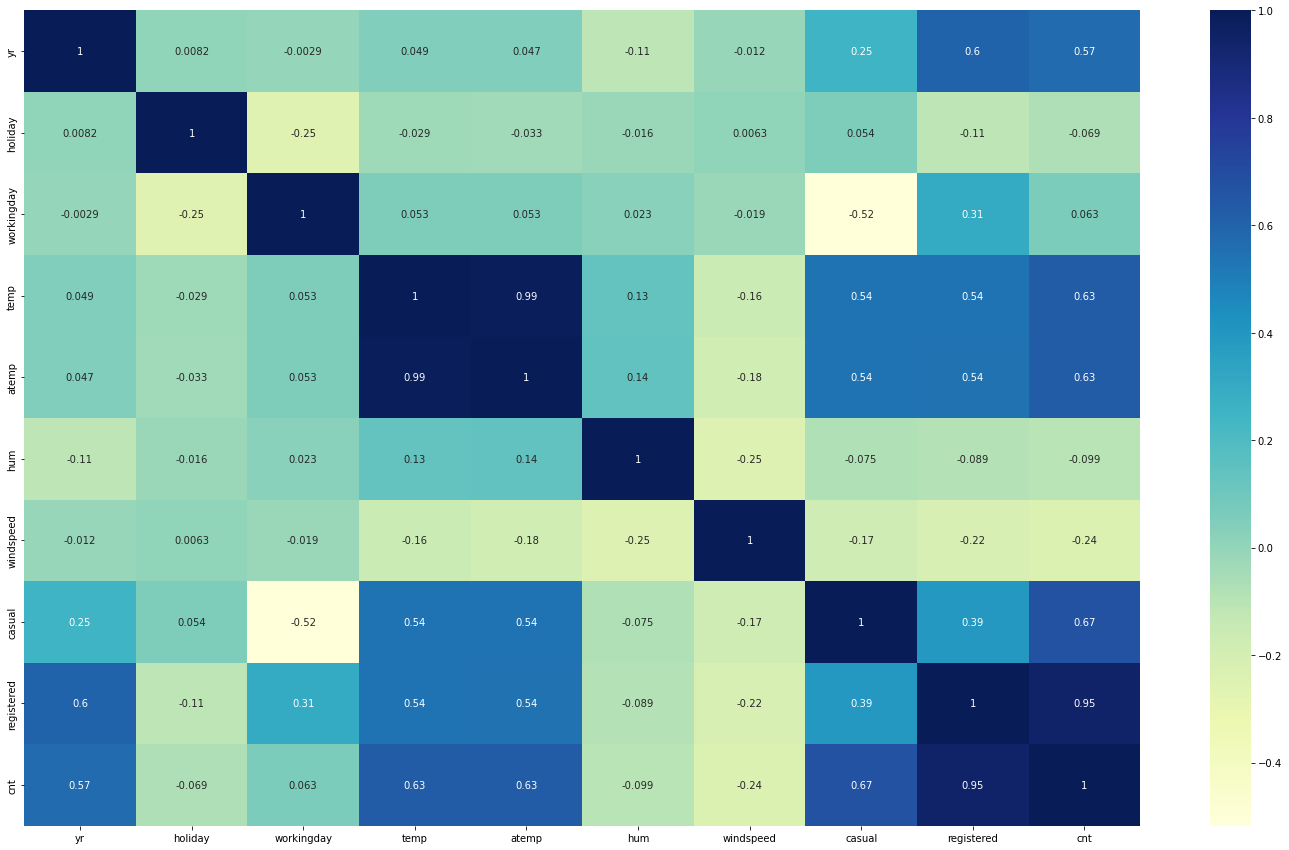

In [23]:
#construct a headmap to check the corelation between variables

plt.figure(figsize=(25,15))
sns.heatmap(bikes.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### Findings:
- cnt has high positive corelation with registered, casual, temp, atemp, yr and high negative corelation with windspeed.
- we understand high corelation of casual, registered and cnt as cnt = casual + registered as per data dictionary.
- when there is increase in windspeed there would be decrease in cnt.
- temp and atemp has extreamily high correlation with each other, we can drop atemp variable as it is a feel of the temperature.

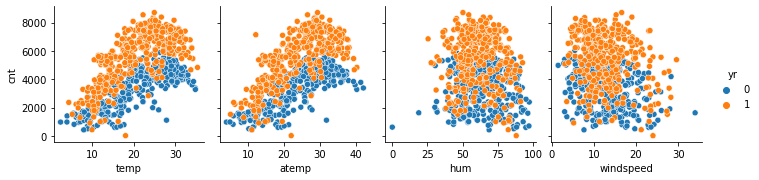

In [24]:
# Visualising relation between the cnt variable and with numeric variables 'temp', 'atemp', 'hum', 'windspeed' with respect to the year

sns.pairplot(bikes, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , hue='yr', )

plt.show()


#### We clearly see that temperature (temp) and feel temperature (atemp) are identical and has a trend with respect to the output variable cnt.
#### humidity (hum) and windspeed looks randomly plotted
#### year 2019 (1) shows higher rental count 'cnt' than year 2018 (0)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

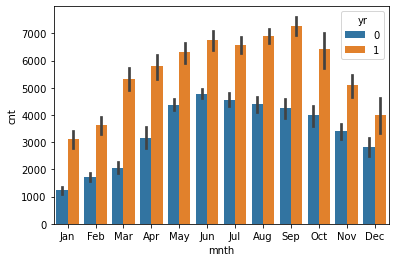

In [25]:
sns.barplot(x='mnth', y='cnt', data=bikes,  hue='yr')

#### bar graph shows a clear pattern of more bike rentals in middle of the year compared to the begining and end of the year
#### again year 2019  shows higher rentals than year 2018



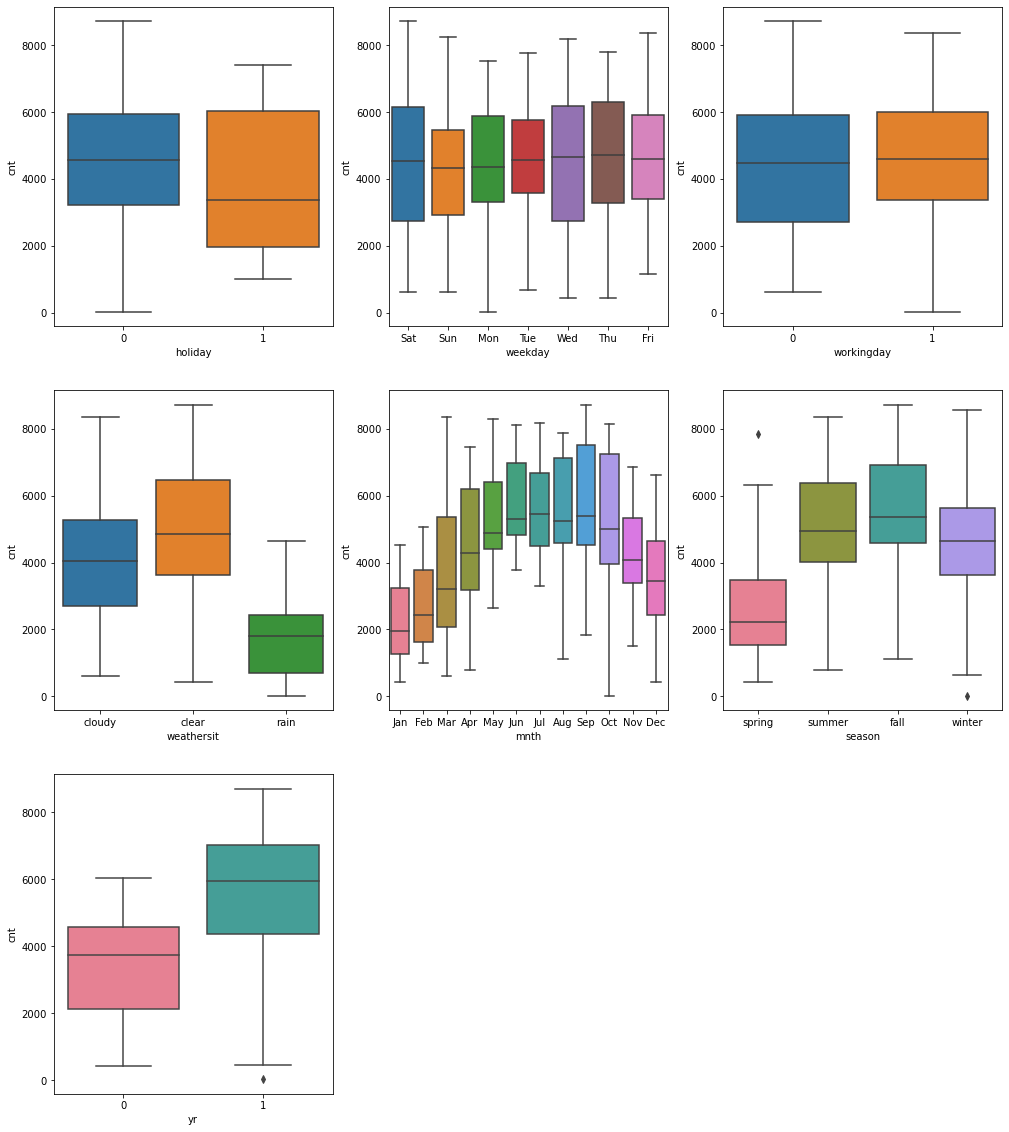

In [26]:
# Checking the distribution of rentals across different categorical variables 
plt.figure(figsize=(17,20))
plt.subplot(3,3,1)
sns.boxplot(x='holiday', y='cnt', data=bikes)
plt.subplot(3,3,2)
sns.boxplot(x='weekday', y='cnt', data=bikes)
plt.subplot(3,3, 3)
sns.boxplot(x='workingday', y='cnt', data=bikes)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit', y='cnt', data=bikes)
plt.subplot(3,3,5)
sns.boxplot(x='mnth', y='cnt', data=bikes, palette='husl') # , palette='husl'
plt.subplot(3,3,6)
sns.boxplot(x='season', y='cnt', data=bikes, palette='husl')
plt.subplot(3,3,7)
sns.boxplot(x='yr', y='cnt', data=bikes, palette='husl')
plt.show()




#### We notice that: 

- Year (1:2019) shows higher bike rentals. It clearly indicate the growing trend of the bike rental business.
- There is a spike in bike rentals on Clear weather, while there is a high dip for rain days. There was no rentals for the heavy rain days. Obviously people tend to use bikes in good pleasant weather.
- September shows the highest rental. followed by July , august and october. Rentals were less in January, february and December, when the weather is harsh. 
- Season graph shows most rental took place in fall when the weather is pleasant.
- Distribution on month and season looks similar.
- Bikes were rented more on non-holidays than holidays as shown by its median.
- Within a week, more number of rentals were seen for Saturdays followed by Wednesdays and Thursdays.
- On average there is no much difference in the renting pattern of working days and non-working days (including weekend and holidays)


## Step 3: Data Preparation

#### We shall create dummy variables for season,weathersit,mnth and weekday

In [27]:
dummies = pd.get_dummies(bikes[ ['season','weathersit','mnth', 'weekday' ]], drop_first=True)
print(" dummies shape: ", dummies.shape)
print(" bike shape before concatination: ", bikes.shape)
# concatinate the dummies to bikes dataframe
bikes = pd.concat([bikes,dummies], axis=1)  

#Now drop the original catogorical variables
bikes = bikes.drop(['season','weathersit','mnth', 'weekday'], axis=1)
print(" bike shape after concatination and drop: ", bikes.shape)
bikes.head()

 dummies shape:  (730, 22)
 bike shape before concatination:  (730, 16)
 bike shape after concatination and drop:  (730, 34)


,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,1,0,0,0,0
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,1,0,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,0,1,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,1


In [28]:
# listing the number of unique values so that we can remove the non needed columns
bikes.nunique()

instant              730
dteday               730
yr                     2
holiday                2
workingday             2
temp                 498
atemp                689
hum                  594
windspeed            649
casual               605
registered           678
cnt                  695
season_spring          2
season_summer          2
season_winter          2
weathersit_cloudy      2
weathersit_rain        2
mnth_Aug               2
mnth_Dec               2
mnth_Feb               2
mnth_Jan               2
mnth_Jul               2
mnth_Jun               2
mnth_Mar               2
mnth_May               2
mnth_Nov               2
mnth_Oct               2
mnth_Sep               2
weekday_Mon            2
weekday_Sat            2
weekday_Sun            2
weekday_Thu            2
weekday_Tue            2
weekday_Wed            2
dtype: int64

#### columns to be dropped :
- instant = it is just the index of the record, it can be dropped
- dteday = this is date field, as we have other coulmns foe the month and season and year, it could be dropped
- casual & registered = these target variable can be dropped as cnt has both of these column data and has a strong correlation 
- atemp , as it has high coorelation with temp

In [29]:
# dropping 'instant', 'dteday', 'casual','registered','atemp'
bikes=bikes.drop(['instant', 'dteday', 'casual','registered','atemp' ], axis=1)
bikes.shape

(730, 29)

## Step 4: Splitting the Data into Training and Testing Sets

The first step for regression is performing a train-test split.

In [30]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)
# 
#df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 42)

In [31]:
# we create a backup original set of data frames ,
df_train_original = df_train
df_test_original = df_test

In [32]:
# Shapes of train and test
print("Shapes of df_train and df_test are ", df_train.shape, df_test.shape)

Shapes of df_train and df_test are  (510, 29) (219, 29)


### Rescaling the Features 
After splitting to test and training, let us scale the values to bring it to managable range
We will use MinMax scaling.

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#### we shall scale all the numeric colums, if at all the colums in binary (0,1) it will remain same.
#### for columns with different values, it scales down to a value between 0 and 1. 
#### Out layers (if any) will also be treated with this scaling

In [34]:
all_cols = df_train.columns
num_cols=['temp', 'hum', 'windspeed', 'cnt']
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [35]:
print(all_cols)
print(num_cols)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'weathersit_cloudy',
       'weathersit_rain', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')
['temp', 'hum', 'windspeed', 'cnt']


In [36]:
# parallely we can scale the same for df_test as well using the df_train scale
#df_test[num_cols] = scaler.transform(df_test[num_cols])

In [37]:
# check few records after scaling, to find all values are between 0 to 1
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Step 5: Building a linear model

As we have 29 features, We will be using the **RFE and LinearRegression function from SciKit Learn** for initial feature selection. later shall be continuing with `statsmodels` and Fit a regression line through the training data. 
In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` or else regression line will passing through the origin, by default.

In [38]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# prepare X_train and y_train 
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
# Running RFE with the output number of the variable equal to 13
lmr = LinearRegression()
lmr.fit(X_train, y_train)

rfe = RFE(lmr, 13)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
# here re the column and its ranking from RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 14),
 ('season_winter', True, 1),
 ('weathersit_cloudy', True, 1),
 ('weathersit_rain', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 10),
 ('mnth_Mar', False, 12),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 5),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 3),
 ('weekday_Thu', False, 15),
 ('weekday_Tue', False, 16),
 ('weekday_Wed', False, 13)]

In [42]:
# Here are the RFE supported columns
rfe_sup_col = X_train.columns[rfe.support_]
print(rfe_sup_col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'weathersit_cloudy',
       'weathersit_rain', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat'],
      dtype='object')


In [43]:
# We shall drop all other un supported colums from the X_train
X_train_init = X_train
drop_rfe_unsupport = X_train.columns[~rfe.support_]
drop_rfe_unsupport

Index(['season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Mon', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')

In [44]:
X_train_rfe= X_train.drop(drop_rfe_unsupport, axis=1)
X_train_rfe.shape

(510, 13)

### Building model using statsmodel, for the detailed statistics

In [45]:
# import statsmodel and  Adding a constant variable to X_train_rfe
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [46]:
# Running the linear model , fit it for training data
lm = sm.OLS(y_train,X_train_rfe).fit()

In [47]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 21 Dec 2021   Prob (F-statistic):          3.81e-190
Time:                        05:44:36   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2935      0.03

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
def find_vif(X_train_rfe):
    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

find_vif(X_train_rfe)

             Features    VIF
0               const  67.38
4                temp   2.99
7       season_spring   2.55
5                 hum   1.89
3          workingday   1.88
8       season_winter   1.78
13        weekday_Sat   1.78
9   weathersit_cloudy   1.57
11           mnth_Jul   1.30
10    weathersit_rain   1.25
6           windspeed   1.17
2             holiday   1.16
12           mnth_Sep   1.11
1                  yr   1.03


#### We see that all p values are nearly 0 and under control, as well as the VIF with lalues less than 5.
#### With the domain knowledge we know workingday consist of weekend, weekdays and holiday data. So we can remove holiday and check if there is any change in R2
#### With best practice, we shall drop this field holiday and retrain the model.

In [49]:
#break_point
X_train_rfe_old = X_train_rfe
X_train_rfe = X_train_rfe.drop('holiday', axis=1)


In [50]:
# retrain with new training data
lm2 = sm.OLS(y_train, X_train_rfe).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 21 Dec 2021   Prob (F-statistic):          2.88e-190
Time:                        05:44:36   Log-Likelihood:                 508.93
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     497   BIC:                            -936.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2842      0.03

In [51]:
# New VIF after droping a feature
find_vif(X_train_rfe)

             Features    VIF
0               const  66.26
3                temp   2.99
6       season_spring   2.54
4                 hum   1.89
7       season_winter   1.77
2          workingday   1.65
12        weekday_Sat   1.64
8   weathersit_cloudy   1.57
10           mnth_Jul   1.30
9     weathersit_rain   1.25
5           windspeed   1.17
11           mnth_Sep   1.10
1                  yr   1.03


#### AIC is improved by 3 and R2 and adjusted R2 is only imroved by .001, we can still optimise it.
- Though p value and VIF are within accepted limits, we gi forward and try droping weekday_Sat based on business domain knowledge

In [52]:
# There was no significant change in R-squared value.
X_train_rfe_old2 = X_train_rfe
X_train_rfe = X_train_rfe.drop('weekday_Sat', axis=1)

In [53]:
#find_vif(X_train_rfe)
# retrain with new training data
lm3 = sm.OLS(y_train, X_train_rfe).fit()
print(lm3.summary())
find_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.6
Date:                Tue, 21 Dec 2021   Prob (F-statistic):          1.99e-187
Time:                        05:44:37   Log-Likelihood:                 499.37
No. Observations:                 510   AIC:                            -974.7
Df Residuals:                     498   BIC:                            -923.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3204      0.03

#### AIC is improved by 16 and R2 and adjusted R2 is decreased by .006, we can still optimise it.
- Though p value and VIF are within accepted limits, we gi forward and try droping humidity based on business domain knowledge

In [54]:
# There was no significant change in R-squared value.
X_train_rfe_old3 = X_train_rfe
X_train_rfe = X_train_rfe.drop('hum', axis=1)

In [55]:
# retrain with new training data
lm4 = sm.OLS(y_train, X_train_rfe).fit()
print(lm4.summary())
find_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.2
Date:                Tue, 21 Dec 2021   Prob (F-statistic):          4.81e-185
Time:                        05:44:37   Log-Likelihood:                 490.87
No. Observations:                 510   AIC:                            -959.7
Df Residuals:                     499   BIC:                            -913.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2352      0.02

#### We see that all p values are nearly 0 and under control, as well as the VIF with lalues less than 5.
#### AIC is improved by 15 and R2 and adjusted R2 is only decreased by .006
#### prob of F-stat is almost 0, so the model is a good fit, but still can be optimised further.


## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [56]:
y_train_pred = lm4.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

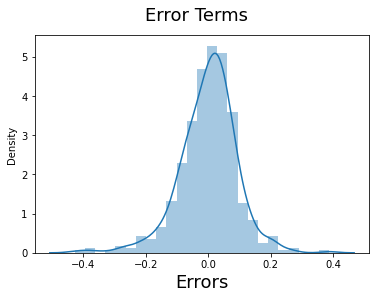

In [57]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 25)
fig.suptitle('Error Terms', fontsize = 18)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### We see that the error is normally distributed with mean 0, so this model seems to be fine

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions

### Dividing into X_test and y_test
- We shall scale the X_test we can go ahead and create y_test by poping out cnt



In [58]:
# we can scale df_test using the df_train scale for num_cols
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [59]:
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
# Now let's use our model to make predictions.

# Adding a constant variable 
X_test_new = sm.add_constant(X_test)

# Creating X_test_new dataframe with only the variable available on X_test
X_test_new = X_test_new[X_train_rfe.columns]



In [61]:
# Making predictions with the latest model
y_test_pred = lm4.predict(X_test_new)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

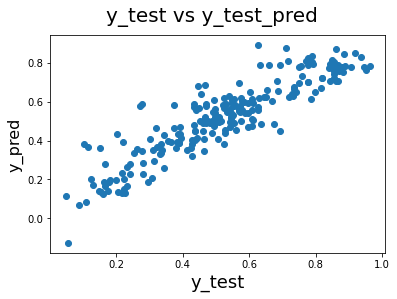

In [62]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)         # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

#### This chart y_test vs y_test_predict show that the model predicts good on test data. It will also predict good for future data as well.

In [63]:
# Let us check the reliability of the model with R2 scores
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8080732347293964

In [64]:
r2_score(y_train, y_train_pred)

0.8303432883084574

In [65]:
print(r2_score(y_train, y_train_pred) - r2_score(y_test, y_test_pred))

0.022270053579060978


The difference in R2 score is about 2.2% which shows our model is decent enough to predict.

our final model has 10 features, that can be used in predicting the bike rentals:

$ cnt = 0.235 + (0.450 \times temp) + ( -0.285 \times weathersit_rain)+ ( 0.234 \times yr) + ( -0.139 \times windspeed)+ 
( -0.113 \times season_spring) + ( -0.081 \times weathersit_coudy) + ( -0.070 \times mnth_Jul)+ ( 0.054 \times mnth_Sep) +
( 0.046 \times season_winter) +  ( 0.023 \times workingday) $


